In [7]:
%matplotlib notebook
import splines as spl
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt

In [87]:
def ep_labnum(t, x_t, num_splines, reg_factor=0.1):
  default_spl = spl.spline(np.ones(num_splines), x_min=t[0], x_max=t[-1])
  mu = np.array([default_spl.beta_j(j, t) for j in range(num_splines)]).T
  lmbda = reg_factor
  m_1 = mu.T@mu
  b = mu.T@x_t.T
  m_2 = spl.matrix_m2(num_splines)
  M = m_1 + lmbda*m_2
  res = np.linalg.solve(M, b)
  return res


In [31]:
def get_points(m_data, n_splines, x_min=0, x_max=1):
  t = np.linspace(x_min, x_max, m_data)
  weights = np.random.rand(n_splines)
  weights = np.array(weights)
  new_spline = spl.spline(weights, x_min=t[0], x_max=t[-1])
  spl_t = new_spline(t)
  mu, sigma = 0, np.std(spl_t) / 3
  err = np.random.normal(mu, sigma, m_data)
  err = np.array(err)
  x_t = spl_t + err
  return t, x_t, spl_t, weights


<IPython.core.display.Javascript object>


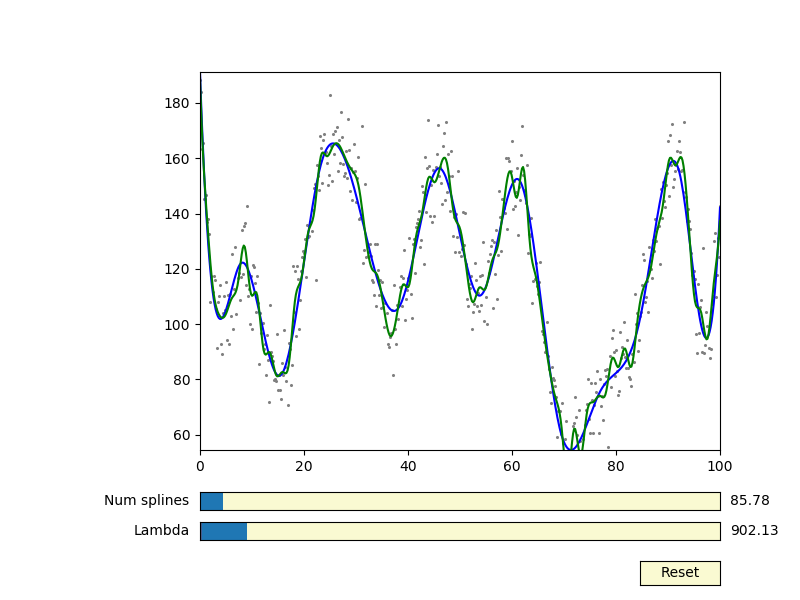

In [91]:
%matplotlib notebook
from matplotlib.widgets import Slider, Button, RadioButtons
num_data = 500
num_splines = 16
x_min = 0
x_max = 100
show_points = True
i, x_i, spl_i, weights = get_points(num_data, num_splines, x_min=x_min, x_max=x_max)

# You can define any function below to test the interpolation!
# show_points = False
# i = np.linspace(x_min, x_max, num_data)
# spl_i = np.multiply(np.exp(np.sin(i/10)), i)
# x_i = spl_i

adjusted = ep_labnum(i, x_i, num_splines)
fig, ax = plt.subplots(figsize=(8,6))
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 10
f0 = 0.1
l, = plt.plot(t, s, lw=2, color='red')
k, = plt.plot(i, spl_i, color='blue')
if show_points and len(i) <= 1000:
    plt.scatter(i, x_i, s=1.5, color="gray")
    
regr, = plt.plot(i, spl.spline(adjusted, x_min=i[0], x_max=i[-1])(i), color='green')
plt.axis([x_min, x_max, np.min(spl_i), np.max(spl_i)])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
sfreq = Slider(axfreq, 'Lambda', 0.1, 0.1*1e5, valinit=f0)
samp = Slider(axamp, 'Num splines', num_splines, num_splines*100, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    regr.set_ydata(spl.spline(ep_labnum(i, x_i, int(amp), reg_factor=freq), x_min=i[0], x_max=i[-1])(i))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

plt.show()

